# TD 7 : Filtre numérique réjecteur

## Partie I

Dans le plan de Laplace, la fonction de transfert du filtre est

\begin{equation}\label{eq:Hp}
H(p) = \frac{1 + p^2}{1 + d p + p^2}, 
\end{equation}

ou $p=\sigma + j\omega$. Donc, la pulsation est la partie imaginaire de p, soit $\omega = \mathrm{Im}(p)$. 

## Question 1

Le gain (échelle linéaire) en fonction de la pulsation est

\begin{equation}\label{eq:HomegaModulus}
| H(p=j\omega) | = \frac{\left|1 + (j\omega)^2 \right|}{\left| 1 + d  (j\omega) +  (j\omega)^2 \right|} = \frac{\left|1 - \omega^2 \right|}{\left| 1 + j d \omega -  \omega^2 \right|}
\end{equation}

Il est zéro ou $1 - \omega_0^2 = 0$ soit $\omega_0 = \pm 1$.

## Question 2

On cherche $\omega_1$ et $\omega_2$ telles que

\begin{equation}
20 \log \left| H(j\omega_{1,2}) \right| = -3 \; \Leftrightarrow \; \left| H(j\omega_{1,2}) \right| = 10^{-3/20}\approx \frac{1}{\sqrt{2}}. 
\end{equation}

En utilisant équation \ref{eq:HomegaModulus}, on a

\begin{equation}\label{eq:}
| H(p=j\omega) |^2 = \frac{\left( 1 - \omega^2 \right)^2}{\left( 1  -  \omega^2 \right)^2 + (d\omega)^2} \stackrel{!}{=} \frac{1}{2}
\end{equation}

et on obtient

\begin{align}
\omega^2 + d \omega - 1 &\stackrel{!}{=} 0 \\
\mathrm{ou}\; \omega^2 - d \omega - 1 &\stackrel{!}{=} 0
\end{align}

En imposant le contraint $\omega > 0$, on obtient

\begin{align}
\omega_1 &= \frac{-d \pm \sqrt{d^2 + 4}}{2} \stackrel{d\ll1,\omega>0}{\approx} \frac{-d + 2}{2} = 1 - \frac{d}{2} = \omega_0 - \frac{d}{2} \\ 
\omega_2 &= \frac{+d \pm \sqrt{d^2 + 4}}{2} \stackrel{d\ll1,\omega>0}{\approx} \frac{d + 2}{2} = 1 + \frac{d}{2} = \omega_0 + \frac{d}{2} 
\end{align}

La largeur de la bande réjectée (en Hz) est 
\begin{equation}
B = \frac{\omega_2 - \omega_1}{2 \pi}
\end{equation}


## Question 3

In [1]:
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider, VBox, HBox, Label, Output
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

Hp = lambda p, d: (1. + p**2) / (1 + d*p + p**2)
omega12 = lambda d: [(-d + np.sqrt(d**2+4)) / 2., (d + np.sqrt(d**2+4)) / 2.] if d > 0 else [1,1]
omega12approx = lambda d: [1-d/2., 1+d/2.] if d > 0 else [1,1]
omegaRange = np.linspace(0, 2, 101)
slider = FloatSlider(min=0, max=1, step=0.01, continuous_update=False)

def plotH(d):
    plt.figure(figsize=(10,6))
    plt.plot(omegaRange, np.absolute(Hp(1j*omegaRange, d)))
    o1, o2 = omega12(d)
    o1a, o2a = omega12approx(d)
    plt.axvspan(o1, o2, color='C1', alpha=0.2)
    plt.axvline(o1, color='C1', alpha=0.5)
    plt.axvline(o2, color='C1', alpha=0.5)
    plt.axvline(o1a, color='k', alpha=1)
    plt.axvline(o2a, color='k', alpha=1)
    plt.axhline(1./np.sqrt(2.), linestyle='--', color='C3')
    plt.axvline(1, linestyle='--', color='C3')
    plt.xlabel(r"$\omega$", fontsize='xx-large')
    plt.ylabel(r"$|H(p=j\omega)|$", fontsize='xx-large')
#     plt.xscale('log')
#     plt.yscale('log')
    plt.grid(True)

interact(plotH, d=slider)
slider.value = 0.1
plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='d', max=1.0, step=0.01), Ou…

# Partie II

La transformation bilinéaire transform l'axe imaginaire $\omega$ du plan de Laplace dans le circle d'unité du plan des z. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from io import BytesIO
plt.style.use('ggplot')


Te = 1. # 1/s
p2z = lambda p, K : (1 + p/K) / (1 - p/K)
phiRange = np.linspace(0, 2*np.pi, 50)
z1 = np.exp(1j*phiRange)

K = 1.83
# K = 0.1

images = []
for k in np.linspace(0, 2, 10):
    newOmega = k * 2*np.pi / Te
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    for n in [1,2,3]:
        ax[0].axhline(n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
        ax[0].axhline(-n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
    ax[0].axvline(0, color='C1')
    ax[0].axhline(0, color='C3')
    ax[0].plot([0,0], [0, newOmega], linewidth=3, color='C0')
    ax[0].scatter([0,0], [0, newOmega], color='C0')
    ax[0].set_xlabel(r"Re(p) = $\sigma$")
    ax[0].set_ylabel(r"Im(p) = $\omega$ = $2\pi f$")
    ax[0].set_title("Plan de Pascal")
    ax[0].set_xlim(-1, 1)
    ax[0].grid(False)
    #---
    ax[1].plot(z1.real, z1.imag, color='C1')
    z = p2z(1j*newOmega, K)
    ax[1].plot([0, z.real], [0, z.imag], linewidth=3, color='C0')
    ax[1].scatter([0, z.real], [0, z.imag], color='C0')
    ax[1].axhline(0, color='C3')
    ax[1].axvline(0, color='C3')
    ax[1].set_xlabel(r"Re(z)")
    ax[1].set_ylabel(r"Im(z)")  
    ax[1].set_title("Plan des z")
    ax[1].grid(False)
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)
    output = BytesIO()
    fig.savefig(output)
    plt.close(fig)  # close figure when we're finished to prevent matplotlib warnings
    output.seek(0)
    images.append(imageio.imread(output))
imageio.mimsave("trafoBiLin.gif", images, fps=5)
    
print("done")

done


La transformation n'est pas exacte - ce que l'on voit mieux visuellemente. 
![trafoBiLin.gif](./trafoBiLin.gif)

## Question 1

On obtient $H^\prime(z)$ en remplaçant $p$ dans équation \ref{eq:Hp} avec la transformation bilinéaire: 

\begin{equation}\label{eq:Hz}
H^\prime(z) = \frac{1 + K^2 + 2 (1-K^2) z^{-1} + (1+K^2) z^{-2}}{1 + dK + K^2 + 2(1-K^2)z^{-1} + (1+K^2-dK)z^{-2}}
\end{equation}

## Question 2

On cherche les zéros $z_1$ et $z_2$ du numérateur. Il y en aura deux vu qu'il s'agit d'un polynom d'ordre 2. On en obtient les pulsations avec $z_{1,2}=e^{j\omega_{1,2}}$. 

\begin{equation}
(1 + K^2) + 2 (1-K^2) z^{-1} + (1+K^2) z^{-2} \stackrel{!}{=} 0 \Leftrightarrow (1 + K^2) z^2 + 2 (1-K^2) z^{1} + (1+K^2) \stackrel{!}{=} 0
\end{equation}

Il s'agit d'un polynôme 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider, VBox, HBox, Label, Output
from IPython.display import clear_output


plt.style.use('ggplot')

Hz = lambda z, K, d: (1+K**2+2*(1-K**2)/z+(1+K**2)/z**2) / (1+d*K+K**2+2*(1-K**2) / z+(1+K**2-d*K)/z**2)

imz = np.linspace(-2, 2, 1000)
rez = np.linspace(-2, 2, 1000)

REZ, IMZ = np.meshgrid(rez, imz)
Z = REZ + 1j * IMZ

phiRange = np.linspace(0, 2*np.pi, 50)
z1 = np.exp(1j*phiRange)


slider_d = FloatSlider(min=0, max=1, step=0.01, continuous_update=False)
slider_K = FloatSlider(min=0, max=3, step=0.1, continuous_update=False)


def plotH(d, K):
    plt.figure(figsize=(16,8))
#     im = plt.imshow(np.log(np.absolute(Hz(Z, K, d))), extent=[rez.min(), rez.max(), imz.min(), imz.max()], cmap=cm.viridis, vmin=0, vmax=1)
    im = plt.imshow(np.absolute(Hz(Z, K, d)), extent=[rez.min(), rez.max(), imz.min(), imz.max()], cmap=cm.viridis, vmin=0, vmax=1)
    plt.axvline(0, color='C0', linewidth=2)
    plt.axhline(0, color='C0', linewidth=2)
    plt.plot(z1.real, z1.imag, color='white')
    plt.xlabel(r"Re(z)")
    plt.ylabel(r"Im(z)")
    ax = plt.gca()
    cb = plt.colorbar(im, orientation='vertical', ax=ax)
    cb.set_label(r"$\ln |H(z)|$")
    plt.grid(True)
    plt.title("Plan des z")

slider_d.value = 0.1
slider_K.value = 1.83
interact(plotH, d=slider_d, K=slider_K)



interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='d', max=1.0, step=0.01), Fl…

<function __main__.plotH(d, K)>

-------------
-------------

La fonction de transfert $H(p)$ est definie comme rapport de la tranformé de Laplace (TL) du signal d'entrée $e(t)$ et celui de sortie $s(t)$ :

\begin{equation}
H(p) = \frac{S(p)}{E(p)}, \; \mathrm{ou} \; \quad S(p) = TL\left\{s(t)\right\} \; \mathrm{et} \; E(p) = TL\left\{e(t)\right\}
\end{equation}

Rappelez que la TL d'une impulsion $e(t) = \delta{t}$ est $E(p) = 1$. Il serait difficile de calculer la TL de l'équation \ref{eq:Hppoles} directement. Mieux l'écrire dans la forme suivante : 

\begin{equation}\label{eq:Hp2frac}
H(p) = \frac{2}{1+p} - \frac{2}{2+p}
\end{equation}

... parce que l'on sait bien que

\begin{equation}\label{eq:tlclassique}
TL\left\{ e^{-at} u(t) \right\} = \frac{1}{p+a} \;\Leftrightarrow\; TL\left\{ \frac{1}{p+a} \right\} = e^{-at} u(t)
\end{equation}

ou $u(t)$ est la fonction à echelon : $u(t) = 0$ pour $t<0$ et $u(t) = 1$ pour $t\ge0$.

Pour trouver équation \ref{eq:Hp2frac}, Il convient écrire 

\begin{equation}
\frac{A}{1+p} - \frac{B}{2+p} \stackrel{?}{=} \frac{2}{(1+p)(2+p)}
\end{equation}

et calculer $A$ et $B$. 

Avec équations \ref{eq:Hp2frac} et \ref{eq:tlclassique} on obtien la réponse impulsionelle s(t)

\begin{equation}
s(t) = \left( 2 e^{-t} - 2 e^{-2t} \right) u(t). 
\end{equation}


0.0


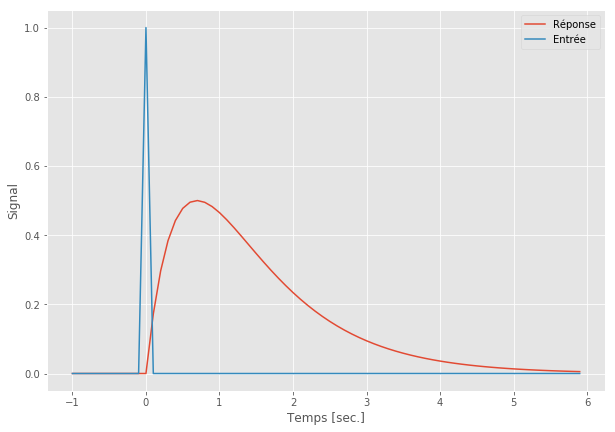

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

e = lambda t: np.exp(-t**2 / 1.e-10)
s = lambda t : 2 * (np.exp(-t) - np.exp(-2*t)) * np.heaviside(t, 1)
t = np.arange(-1, 6, 0.1)

plt.figure(figsize=(10, 7))
plt.plot(t, s(t), label="Réponse")
plt.plot(t, e(t), label="Entrée")
plt.xlabel("Temps [sec.]")
plt.ylabel("Signal")
plt.legend(loc="upper right")
print(e(1.))

## Question 2 - Méthode de l'invariant impulsionnel

D'abord, il faut echantillonner la réponse continue $h(t)$ (equation \ref{eq:repimp}) à une fréquence $f_e = 1/T_e = 2\,$Hz. La réponse discrète $h[n]$ est

\begin{equation}\label{eq:hn}
h[n] = T_e h(n T_e) = \left(e^{-nT_e} - e^{-2nT_e} \right) ; n\ge0. 
\end{equation}

Pourquoi le factor de $T_e$ ? $\Rightarrow$ [Formule sommatoire de Poison](https://fr.wikipedia.org/wiki/Formule_sommatoire_de_Poisson)

Les premiers 4 coefficients sont:

In [5]:
import numpy as np
Te = 0.5  # 1/s
h = lambda n : np.exp(-n*Te) - np.exp(-2*n*Te)
for n in [0,1,2,3]:
    print("pour n = 0 : h[0] = ", h(n))

pour n = 0 : h[0] =  0.0
pour n = 0 : h[0] =  0.238651218541
pour n = 0 : h[0] =  0.232544157935
pour n = 0 : h[0] =  0.173343091781


## Question 3

In [6]:
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider, VBox, HBox, Label, Output
import numpy as np
from IPython.display import clear_output

Te = 0.5 # 1/s
p2z = lambda p : (2 + Te*p) / (2 - Te*p)
phiRange = np.linspace(0, 2*np.pi, 50)
z1 = np.exp(1j*phiRange)


slider = FloatSlider(min=-3, max=3, step=0.1, continuous_update=False)
out = Output()

def update(change):
#    line.set_ydata(np.sin(w * x))
    with out: 
        clear_output()
        newOmega = change.new * 2*np.pi / Te
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
        for n in [1,2,3]:
            ax[0].axhline(n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
            ax[0].axhline(-n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
        ax[0].axvline(0, color='C1')
        ax[0].axhline(0, color='C3')
        ax[0].plot([0,0], [0, newOmega], linewidth=3, color='C0')
        ax[0].scatter([0,0], [0, newOmega], color='C0')
        ax[0].set_xlabel(r"Re(p) = $\sigma$")
        ax[0].set_ylabel(r"Im(p) = $\omega$ = $2\pi f$")
        ax[0].set_title("Plan de Pascal")
        ax[0].set_xlim(-1, 1)
        ax[0].grid(False)
        #---
        ax[1].plot(z1.real, z1.imag, color='C1')
        z = p2z(1j*newOmega)
        ax[1].plot([0, z.real], [0, z.imag], linewidth=3, color='C0')
        ax[1].scatter([0, z.real], [0, z.imag], color='C0')
        ax[1].set_xlabel(r"Re(z)")
        ax[1].set_ylabel(r"Im(z)")  
        ax[1].set_title("Plan des z")
        ax[1].grid(False)
        plt.show()
#     fig.canvas.draw()

slider.observe(update, 'value')
slider.value = 0.
slider.label = r"$\omega$"
display(VBox([HBox([Label(r"$\omega$"), slider]), out]))
#interact(update, ax=ax, w=fslider)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from io import BytesIO
plt.style.use('ggplot')


Te = 0.5 # 1/s
p2z = lambda p : (2 + Te*p) / (2 - Te*p)
phiRange = np.linspace(0, 2*np.pi, 50)
z1 = np.exp(1j*phiRange)

images = []
for k in np.linspace(0, 2, 100):
    newOmega = k * 2*np.pi / Te
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    for n in [1,2,3]:
        ax[0].axhline(n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
        ax[0].axhline(-n*2*np.pi/Te, color='C3', linestyle='--', alpha=0.6)
    ax[0].axvline(0, color='C1')
    ax[0].axhline(0, color='C3')
    ax[0].plot([0,0], [0, newOmega], linewidth=3, color='C0')
    ax[0].scatter([0,0], [0, newOmega], color='C0')
    ax[0].set_xlabel(r"Re(p) = $\sigma$")
    ax[0].set_ylabel(r"Im(p) = $\omega$ = $2\pi f$")
    ax[0].set_title("Plan de Pascal")
    ax[0].set_xlim(-1, 1)
    ax[0].grid(False)
    #---
    ax[1].plot(z1.real, z1.imag, color='C1')
    z = p2z(1j*newOmega)
    ax[1].plot([0, z.real], [0, z.imag], linewidth=3, color='C0')
    ax[1].scatter([0, z.real], [0, z.imag], color='C0')
    ax[1].axhline(0, color='C3')
    ax[1].axvline(0, color='C3')
    ax[1].set_xlabel(r"Re(z)")
    ax[1].set_ylabel(r"Im(z)")  
    ax[1].set_title("Plan des z")
    ax[1].grid(False)
    ax[1].set_xlim(-1.1, 1.1)
    ax[1].set_ylim(-1.1, 1.1)
    output = BytesIO()
    fig.savefig(output)
    plt.close(fig)  # close figure when we're finished to prevent matplotlib warnings
    output.seek(0)
    images.append(imageio.imread(output))
imageio.mimsave("trafoBiLin.gif", images, fps=10)
    
print("done")

done


La transformation bilinéaire transform l'axe imaginaire $\omega$ du plan de Laplace dans le circle d'unité du plan des z:
![trafoBiLin.gif](./trafoBiLin.gif)

In [11]:
import matplotlib.pyplot as plt
from ipywidgets import *
from math import * 
import numpy as np
# %matplotlib inline

default_value = 1  # Default value of amplutide 

a = IntSlider(min = 1, max = 10, value = default_value, description = 'Amplitude of sine function', continuous_update=False)
b = IntSlider(min = 1, max = 10, value = default_value, description = 'Amplitude of sine function', continuous_update=False)

mylink = jslink((a, 'value'), (b, 'value'))

def widget_sine_function(amp_s = a):
  x = np.linspace(0,20,100000)  # Creat x-values for sine function
  y = [amp_s*sin(i) for i in x]  # Create y-values for sine function with amplitude according to value of widget a
#   plt.clf()
  plt.figure(figsize=(15,5))
#   plt.subplot(1, 2, 1)
  plt.plot(x,y)

interact(widget_sine_function)

# SECOND JUPYTER NOTEBOOK CELL
def widget_cosine_function(amp_c = b):
  x = np.linspace(0,20,100000)  # Creat x-values for cosine function
  y = [amp_c*cos(i) for i in x]  # Create y-values for cosine function with amplitude according to value of widget b
#   plt.clf()
  plt.figure(figsize=(15,5))
#   plt.subplot(1, 2, 1)
  plt.plot(x,y)

interact(widget_cosine_function)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Amplitude of sine function', ma…

interactive(children=(IntSlider(value=1, continuous_update=False, description='Amplitude of sine function', ma…

<function __main__.widget_cosine_function(amp_c=IntSlider(value=1, continuous_update=False, description='Amplitude of sine function', max=10, min=1))>

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig


StaticInteract(plot,
               amplitude=RangeWidget(0.1, 1.0, 0.1),
               color=RadioWidget(['blue', 'green', 'red']))

ImportError: cannot import name 'StaticInteract'